# **Convolutions, Blurring and Sharpening Images**

**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imshow(image, title="", size=5):
    w, h= image.shape[:2]
    aspect_ratio= w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)

## **Blurring using Convolutions**

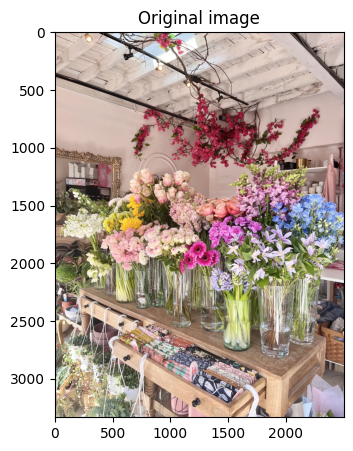

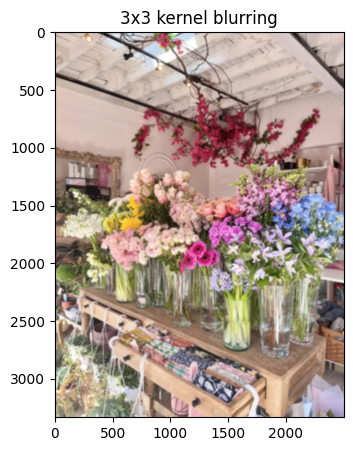

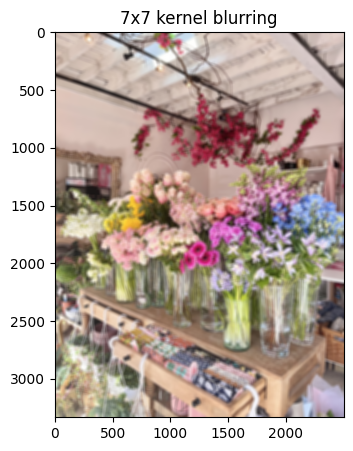

In [7]:
image= cv2.imread('images/flowers.jpg')
imshow(image, 'Original image')

# Creating our kernel
kernel_1= np.ones((15,15), np.float32)/225
#print('kernel 1: \n', kernel_1)

# We use the cv2.fitler2D to convolve the kernal with an image 
blurred= cv2.filter2D(image, -1, kernel_1)
imshow(blurred, '3x3 kernel blurring')

# Creating our kernel
kernel_2= np.ones((30,30), np.float32)/900
#print('kernel 2:\n', kernel_2)

blurred2= cv2.filter2D(image, -1, kernel_2)
imshow(blurred2, '7x7 kernel blurring')

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

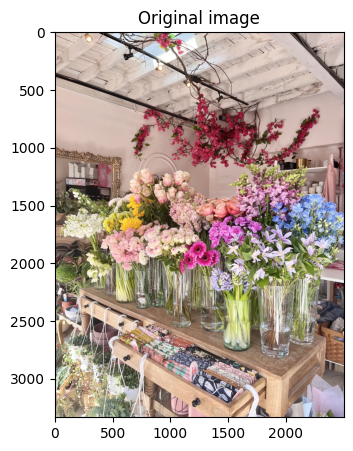

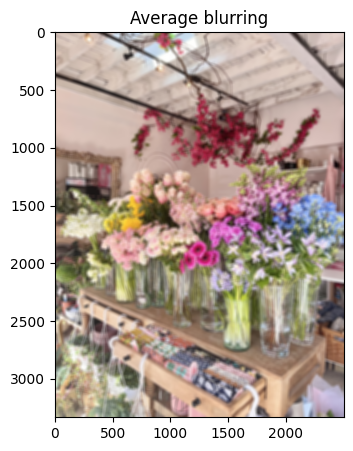

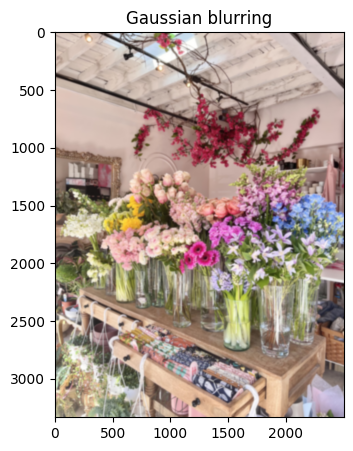

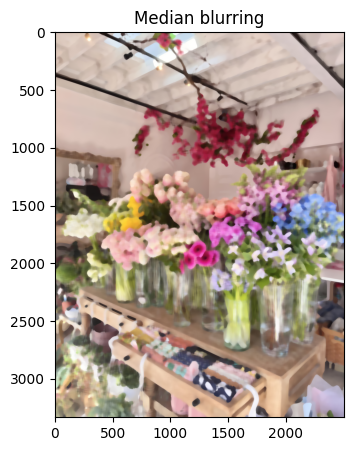

In [126]:
image= cv2.imread('images/flowers.jpg')
imshow(image, 'Original image')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
average_blur= cv2.blur(image, (30,30))
imshow(average_blur, 'Average blurring')

# Instead of box filter, gaussian kernel
gaussian_blur= cv2.GaussianBlur(image, (31,31), 0)
imshow(gaussian_blur, 'Gaussian blurring')

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median_blur= cv2.medianBlur(image, 31)
imshow(median_blur, 'Median blurring')

### **Bilateral Filter**

```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```

- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

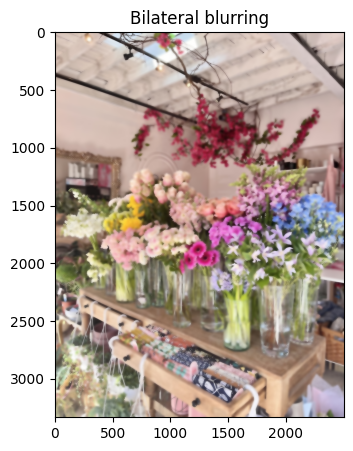

In [16]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral_blue= cv2.bilateralFilter(image, 30, 300, 300)
imshow(bilateral_blue, 'Bilateral blurring')

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:	

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

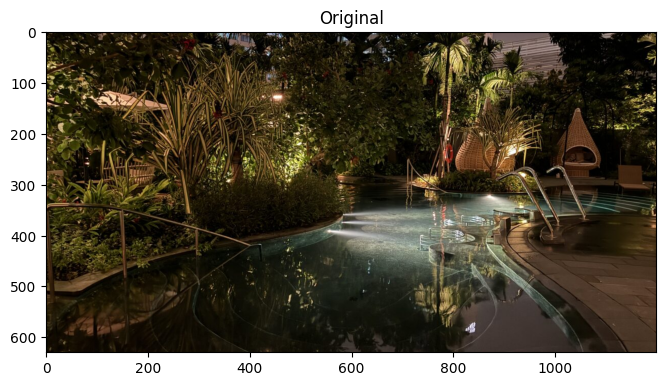

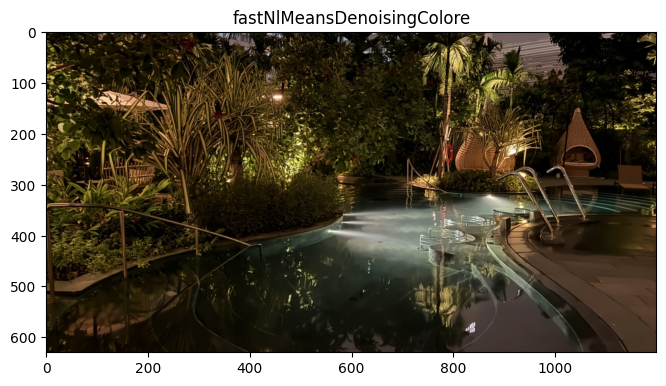

In [47]:
image= cv2.imread('images/hilton.jpg')
imshow(image, 'Original', 15)

dst= cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow(dst, 'fastNlMeansDenoisingColore', 15)

### **Sharpening Images**

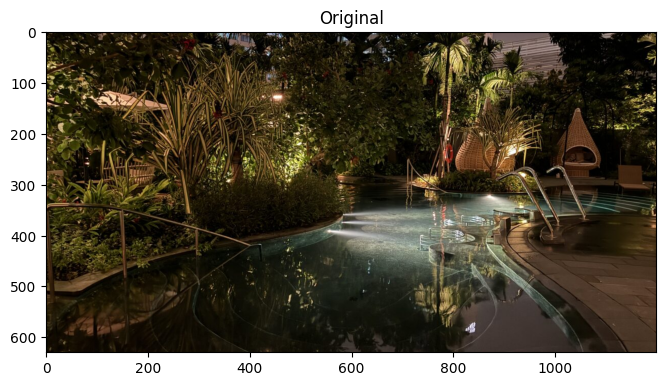

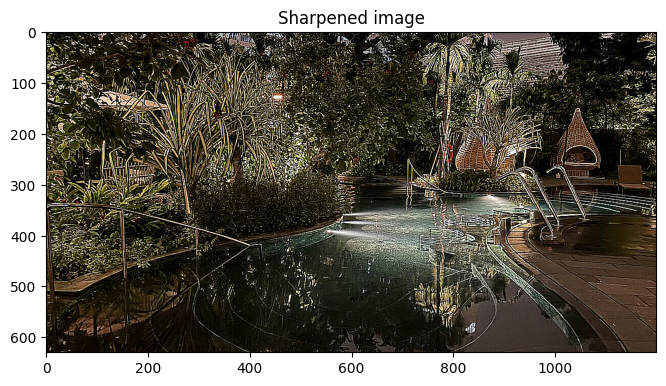

In [64]:
image= cv2.imread('images/hilton.jpg')
imshow(image, 'Original', 15)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening= np.array([[-1,-1,-1],
                             [-1, 9,-1],
                             [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened= cv2.filter2D(image, -1, kernel_sharpening)
imshow(sharpened, 'Sharpened image', 15)